In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def Readfile(filename):
    a = open(filename, 'r')
    text = a.readlines()

    lines=[]
    for line in text:
        b = line.split()
        lines.append(b)
    T =[]
    for i in range(4,len(lines)-1):
        t= lines[i]
        T.append(t)
    Temp=[]
    Pos=[]
    for j in range(len(T)):
        p=float(T[j][1])
        q=float(T[j][3])
        Pos.append(p)
        Temp.append(q)
    return Pos, Temp

In [6]:
def values(filename):
    a = open(filename, 'r')
    text = a.readlines()

    lines=[]
    for line in text:
        b = line.split()
        lines.append(b)
    
    
    Val =[]
    
    for i in range(len(lines)):
        q= float(lines[i][0])
        Val.append(q)    
    return Val

In [7]:
theta_max = 30
number = int(theta_max/2 +1)
theta = np.linspace(0,theta_max,number)



In [8]:
Lx_zz = np.array(values("length_x.dat"))*(10**(-10))
Ly_zz = np.array(values("length_y.dat"))*(10**(-10))
z_zz= 3.35*(10**(-10))                                        #Interlayer spacing
rt_zz = np.array(values("res_thick_val.dat"))*(10**(-10))

Lx_ac = np.array(values("length_x.dat"))*(10**(-10))
Ly_ac = np.array(values("length_y.dat"))*(10**(-10))
z_ac = 3.35*(10**(-10))                                       #Interlayer spacing
rt_ac = np.array(values("res_thick_val.dat"))*(10**(-10))

In [9]:
time_zz = np.array(values("time_val.dat"))*(10**(-12))
Qin_zz = np.array(values("heat_in_val.dat"))*(1.6022*10**(-19))
Qout_zz = np.array(values("heat_out_val.dat"))*(1.6022*10**(-19))

time_ac = np.array(values("time_val.dat"))*(10**(-12))
Qin_ac = np.array(values("heat_in_val.dat"))*(1.6022*10**(-19))
Qout_ac = np.array(values("heat_out_val.dat"))*(1.6022*10**(-19))

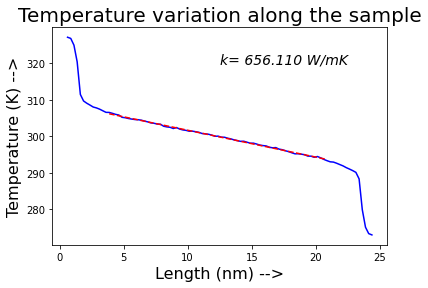

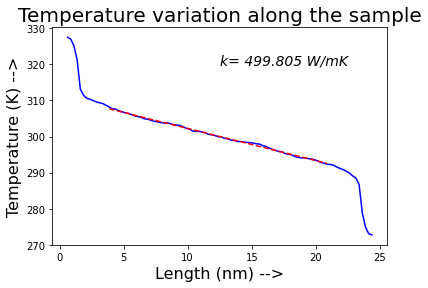

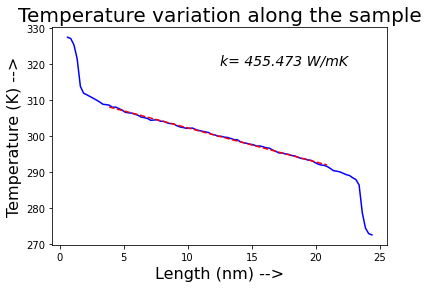

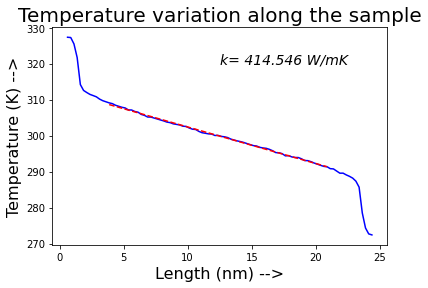

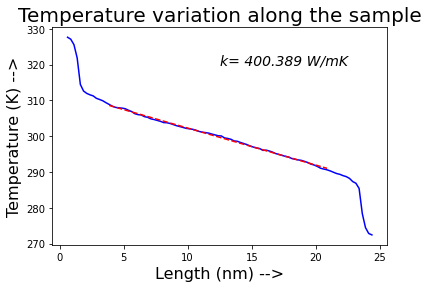

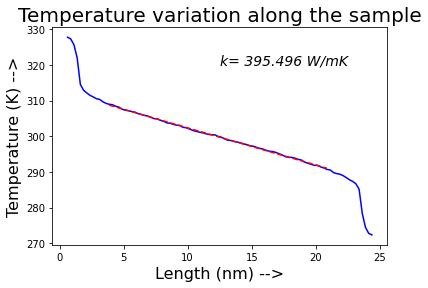

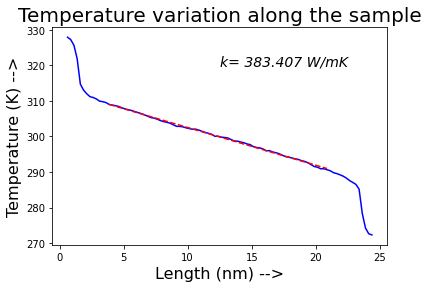

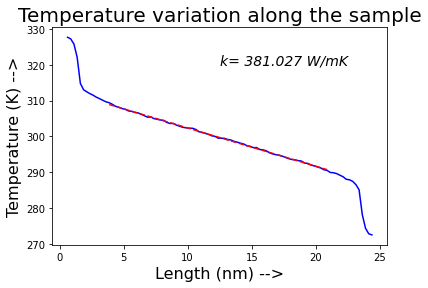

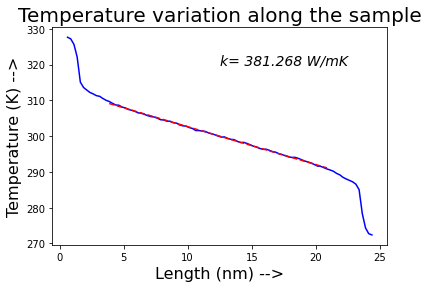

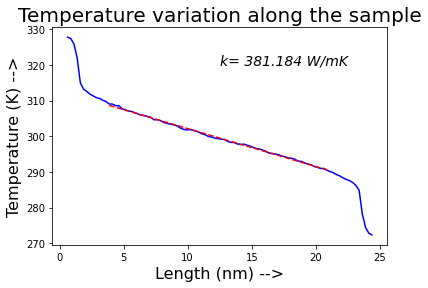

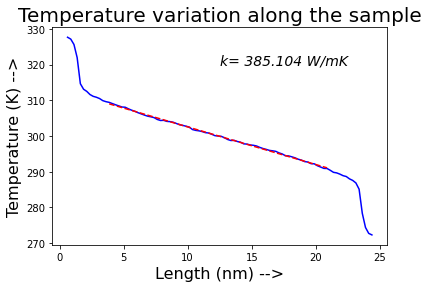

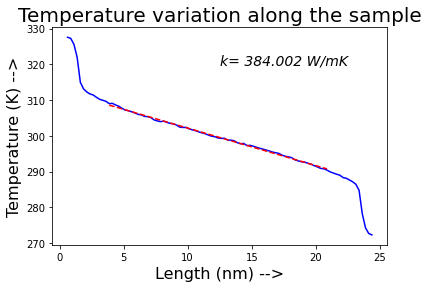

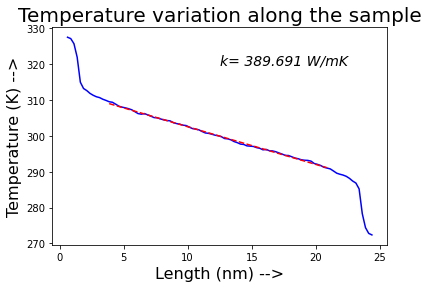

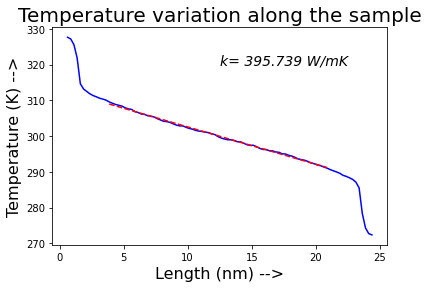

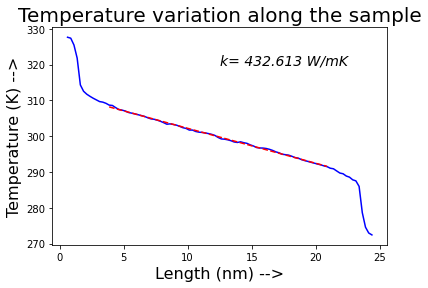

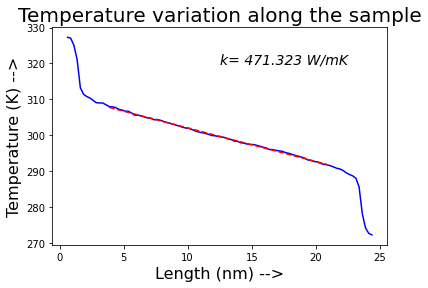

In [11]:
K_zz=[]

for i in range(len(time_zz)):
    th = theta[i]
    [X,T]= Readfile("bilayer_profile.%d.langevin" %th)
    X2 = (Lx_zz[i])*np.array(X) * (10**9)
    X3 = (Lx_zz[i])*np.array(X) * (10**9)
    T = np.array(T)
    a1 = 2
    a2 = 15
    b2 = 84
    b1 = 98
    X3 = X3 [a1:b1]
    T3= T [a1:b1]
    X1 = X2[a2:b2]
    T1= T[a2:b2]
    l1 = np.polyfit(X1, T1, 1)
    line1=l1[1]+l1[0]*X1
    area_zz=2*z_zz*Ly_zz[i]
    slope_zz = abs (l1[0])*(10**(9))
    k_zz = (0.5 *(abs(Qin_zz[i])+Qout_zz[i]))/((area_zz)*(time_zz[i])*(slope_zz))
    
    plt.figure(i)
    plt.plot(X3,T3, "b")
    plt.plot(X1, line1, '--r')
    plt.xlabel("Length (nm) -->",fontsize=16)
    plt.ylabel("Temperature (K) -->",fontsize=16)
    plt.title("Temperature variation along the sample", fontsize=20)
    #plt.suptitle("Thermostat=Langevin & Boundary = F P P", fontsize=16)
    plt.text(12.5, 320, 'k= %4.3f W/mK' % k_zz, style='italic', fontsize=14)
    plt.savefig("th.jpg",dpi=150)
    plt.show()
    
    K_zz.append(k_zz)

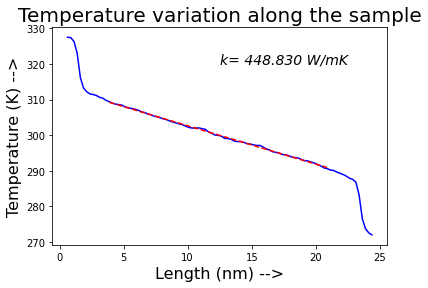

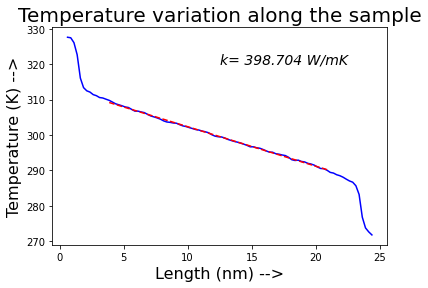

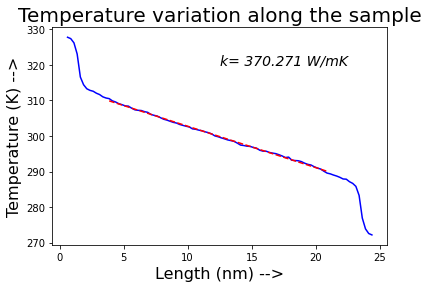

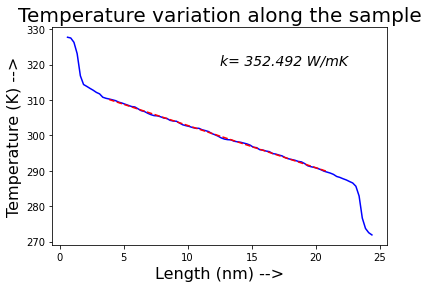

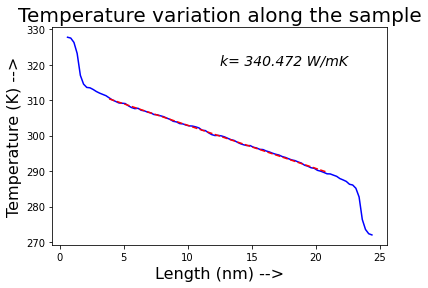

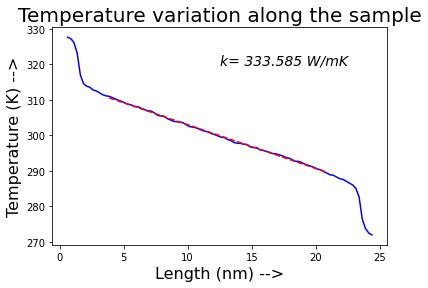

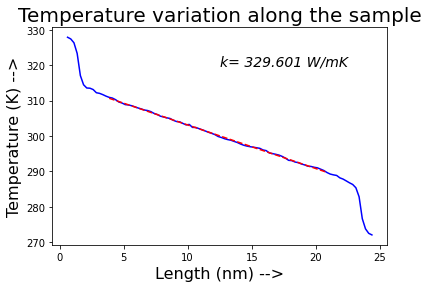

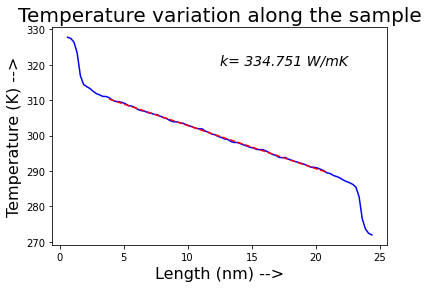

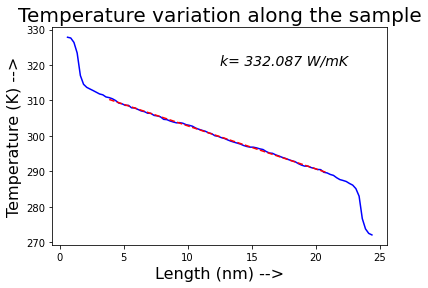

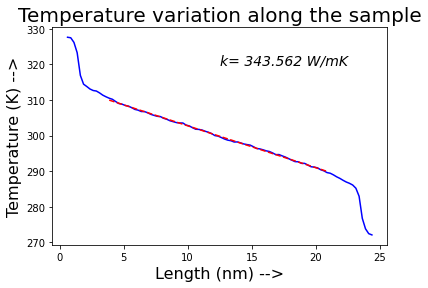

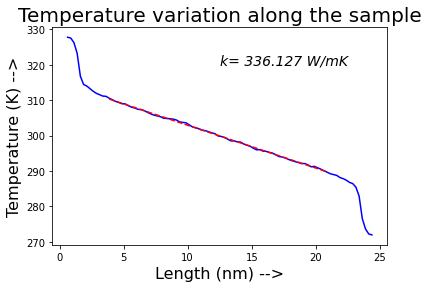

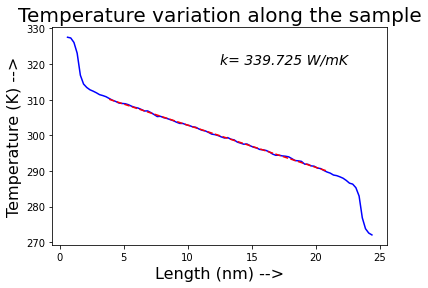

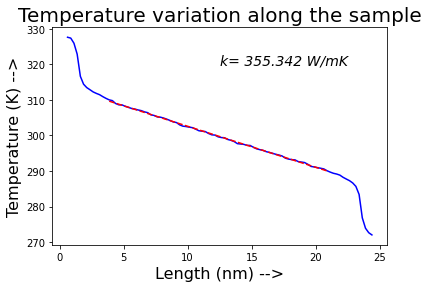

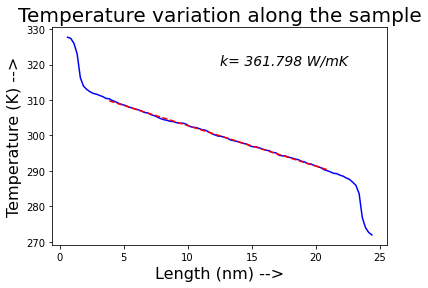

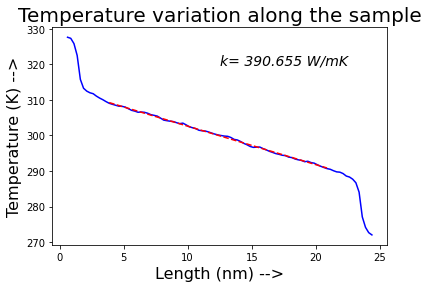

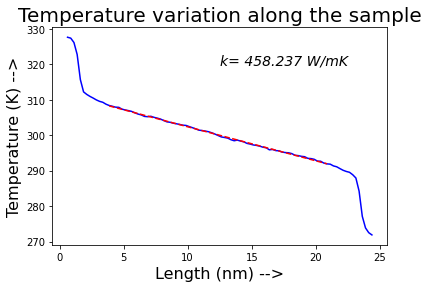

In [12]:
K_ac=[]

for i in range(len(time_zz)):
    th = theta[i]
    [X,T]= Readfile("bilayer_profile.ac.%d.langevin" %th)
    X2 = (Lx_ac[i])*np.array(X) * (10**9)
    X3 = (Lx_ac[i])*np.array(X) * (10**9)
    T = np.array(T)
    a1 = 2
    a2 = 15
    b2 = 84
    b1 = 98
    X3 = X3 [a1:b1]
    T3= T [a1:b1]
    X1 = X2[a2:b2]
    T1= T[a2:b2]
    l1 = np.polyfit(X1, T1, 1)
    line1=l1[1]+l1[0]*X1
    area_ac=2*z_ac*Ly_ac[i]
    slope_ac = abs (l1[0])*(10**(9))
    k_ac = (0.5 *(abs(Qin_ac[i])+Qout_ac[i]))/((area_ac)*(time_ac[i])*(slope_ac))
    
    plt.figure(i)
    plt.plot(X3,T3, "b")
    plt.plot(X1, line1, '--r')
    plt.xlabel("Length (nm) -->",fontsize=16)
    plt.ylabel("Temperature (K) -->",fontsize=16)
    plt.title("Temperature variation along the sample", fontsize=20)
    #plt.suptitle("Thermostat=Langevin & Boundary = F P P", fontsize=16)
    plt.text(12.5, 320, 'k= %4.3f W/mK' % k_ac, style='italic', fontsize=14)
    plt.show()
    
    K_ac.append(k_ac)

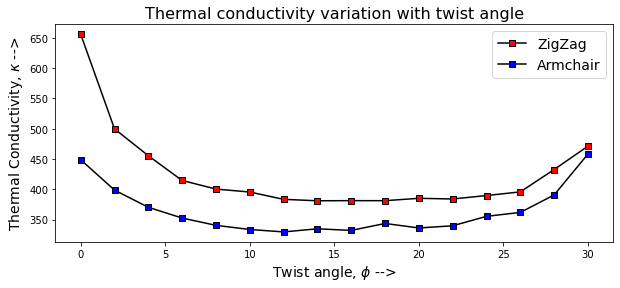

In [19]:
plt.figure(figsize=(10,4))
plt.plot(theta,K_zz,'-ks', mfc='red')
plt.plot(theta,K_ac,'-ks', mfc='blue')
plt.xlabel("Twist angle, $\phi$ -->",fontsize=14)
plt.ylabel("Thermal Conductivity, $\kappa$ -->", fontsize=14)
plt.title("Thermal conductivity variation with twist angle",fontsize=16)
plt.legend(["ZigZag","Armchair"],fontsize=14)
#plt.text(22, 550, 'ZigZag direction', style='italic', fontsize=14)
plt.show()

In [16]:
K_aniso=[]
for i in range(len(theta)):
    k1 = K_zz[i]/K_ac[i]
    K_aniso.append(k1)

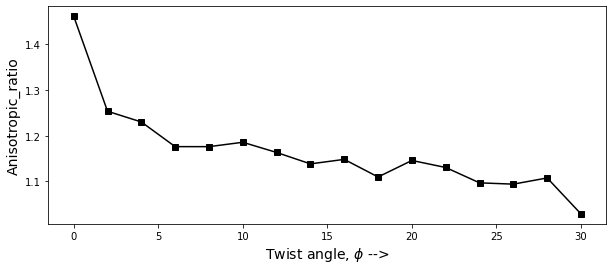

In [17]:
plt.figure(figsize=(10,4))
plt.plot(theta,K_aniso,'-ks', mfc='black')
plt.xlabel("Twist angle, $\phi$ -->",fontsize=14)
plt.ylabel("Anisotropic_ratio", fontsize=14)
plt.show()